In [1]:
import pandas as pd

In [2]:
fileScience = 'schoolscience2018.xlsx'
fileMath = 'schoolmath2018.xlsx'
fileEnglish = 'schoolenglish2018.xlsx'
fileEnrollment = 'schoolenrollment22018.xlsx'
fileHistory = 'schoolhistory2018.xlsx'
fileSummary = 'schoolSummary2018.xlsx'
fileConstants = 'constants.xlsx'

const = pd.read_excel(fileConstants, index_col=0)
summ = pd.read_excel(fileSummary, index_col=0)
enroll = pd.read_excel(fileEnrollment, index_col=1)

chem = pd.read_excel(fileScience, sheet_name=1, index_col=1)
env = pd.read_excel(fileScience, sheet_name=2, index_col=1)
phyC = pd.read_excel(fileScience, sheet_name=3, index_col=1)
phy1 = pd.read_excel(fileScience, sheet_name=4, index_col=1)
bio = pd.read_excel(fileScience, sheet_name=0, index_col=1)


econMacr = pd.read_excel(fileHistory, sheet_name=0, index_col=1)
econMicr = pd.read_excel(fileHistory, sheet_name=1, index_col=1)
govt = pd.read_excel(fileHistory, sheet_name=2, index_col=1)
euroHist = pd.read_excel(fileHistory, sheet_name=3, index_col=1)
usHist = pd.read_excel(fileHistory, sheet_name=4, index_col=1)
worldHist = pd.read_excel(fileHistory, sheet_name=5, index_col=1)
psy = pd.read_excel(fileHistory, sheet_name=6, index_col=1)

ab = pd.read_excel(fileMath, sheet_name=0, index_col=1)
bc = pd.read_excel(fileMath, sheet_name=1, index_col=1)
stat = pd.read_excel(fileMath, sheet_name=2, index_co1=1)

engLa = pd.read_excel(fileEnglish, sheet_name=0, index_col=1)
engLi = pd.read_excel(fileEnglish, sheet_name=1, index_col=1)

In [3]:
chemistry = pd.concat([chem])
enviromentalSci = pd.concat([env])
physicsCMech = pd.concat([phyC])
physics1 = pd.concat([phy1])
biology = pd.concat([bio])



economicsMacro = pd.concat([econMacr])
economicsMicro = pd.concat([econMicr])
govtPol = pd.concat([govt])
euroHistory = pd.concat([euroHist])
usHistory = pd.concat([usHist])
psychology = pd.concat([psy])
worldHistory = pd.concat([worldHist])


abCalc = pd.concat([ab])
bcCalc = pd.concat([bc])
stats = pd.concat([stat])

englishLang = pd.concat([engLa])
englishLit = pd.concat([engLi])

summary = pd.concat([summ])
enrollment = pd.concat([enroll])
constants = pd.concat([const])

In [4]:
constants["5ConstantSquared"] = constants["5constamt"] ** 2
constants["4ConstantSquared"] = constants["4constant"] ** 2


summary["enroll"] = enroll["total"]
summary["ChemistryIndex"] = 100 * ( chemistry["5rate"] * 1.15 + chemistry["4rate"] * 1.07  ) / enroll["total"]
summary["EnviromentalSciIndex"] = 100 * ( enviromentalSci["5rate"] * 1.195 + enviromentalSci["4rate"] * 1.0207  ) / enroll["total"]
summary["PhysicsCMechIndex"] = 100 * ( physicsCMech["5rate"] * 1.31  + physicsCMech["4rate"] * 1.26  ) / enroll["total"]
summary["Physics1Index"] = 100 * ( physics1["5rate"] * 1.26  + physics1["4rate"] * 1.24  ) / enroll["total"]
summary["BiologyIndex"] = 100 * ( biology["5rate"] * 1.223  + biology["4rate"] * 1.0944  ) / enroll["total"]

summary["WorldHistoryIndex"] = 100 * ( worldHistory["5rate"] * 1.191309 + worldHistory["4rate"] * 1.101399 ) / enroll["total"]
summary["EconomicsMacroIndex"] = 100 * ( economicsMacro["5rate"] * 1.0283 + economicsMacro["4rate"] * .81365 ) / enroll["total"]
summary["EconomicsMicroIndex"] = 100 * ( economicsMicro["5rate"] * 1.0125 + economicsMicro["4rate"] * .606 ) / enroll["total"]
summary["Govt&PolIndex"] = 100 * ( govtPol["5rate"] * 1.1  + govtPol["4rate"] * 1.05 ) / enroll["total"]
summary["EuroHistoryIndex"] = 100 * ( euroHistory["5rate"] * 1.13 + euroHistory["4rate"] * 1.03 ) / enroll["total"]
summary["USHistoryIndex"] = 100 * ( usHistory["5rate"] * 1.159 + usHistory["4rate"] * 1.0944 ) / enroll["total"]
summary["PsychologyIndex"] = 100 * ( psychology["5rate"] * .98 + psychology["4rate"] * .59 ) / enroll["total"]

summary["ABCalculusIndex"] = 100 * ( abCalc["5rate"] * 1.01 + abCalc["4rate"] * .93 ) / enroll["total"]
summary["BCCalculusIndex"] = 100 * ( bcCalc["5rate"] * 1.01 + bcCalc["4rate"] * .93 ) / enroll["total"]
summary["StatisticsIndex"] = 100 * ( stats["5rate"] * 1.0948 + stats["4rate"] * .952 ) / enroll["total"]

summary["EnglishLangIndex"] = 100 * ( englishLang["5rate"] * 1.15 + englishLang["4rate"] * 1.1 ) / enroll["total"]
summary["EnglishLitIndex"] = 100 * ( englishLit["5rate"] * 1.25 + englishLit["4rate"] * 1.24 ) / enroll["total"]


summary = summary.fillna(0)

summary["EnglishIndex"] = summary["EnglishLangIndex"] + summary["EnglishLitIndex"]
summary["MathIndex"] = summary["ABCalculusIndex"] + summary["BCCalculusIndex"] + summary["StatisticsIndex"]
summary["ScienceIndex"] = summary['BiologyIndex'] + summary["ChemistryIndex"] + summary["EnviromentalSciIndex"] + summary["PhysicsCMechIndex"] + summary["Physics1Index"]
summary["HistoryIndex"] = summary["WorldHistoryIndex"]+ summary['EconomicsMacroIndex'] + summary["EconomicsMicroIndex"] + summary["Govt&PolIndex"] + summary["EuroHistoryIndex"] + summary['USHistoryIndex'] + summary['PsychologyIndex']
summary["APIndex"] = summary["ScienceIndex"] + summary["HistoryIndex"] + summary["MathIndex"] + summary["EnglishIndex"]

In [5]:
sorted_by_PsychologyIndex = summary.sort_values(['PsychologyIndex'], ascending=False)
sorted_by_BiologyIndex = summary.sort_values(['BiologyIndex'], ascending=False)
sorted_by_USHistoryIndex = summary.sort_values(['USHistoryIndex'], ascending=False)
sorted_by_MathIndex = summary.sort_values(['MathIndex'], ascending=False)
sorted_by_ScienceIndex = summary.sort_values(['ScienceIndex'], ascending=False)
sorted_by_HistoryIndex = summary.sort_values(['HistoryIndex'], ascending=False)
sorted_by_EnglishIndex = summary.sort_values(['EnglishIndex'], ascending=False)

sorted_by_APIndex = summary.sort_values(['APIndex'], ascending=False)

In [6]:
sorted_by_EnglishIndex.head(35)

,town,enroll,ChemistryIndex,EnviromentalSciIndex,PhysicsCMechIndex,Physics1Index,BiologyIndex,WorldHistoryIndex,EconomicsMacroIndex,EconomicsMicroIndex,...,ABCalculusIndex,BCCalculusIndex,StatisticsIndex,EnglishLangIndex,EnglishLitIndex,EnglishIndex,MathIndex,ScienceIndex,HistoryIndex,APIndex
ID,,,,,,,,,,,,,,,,,,,,,
6550505,Dover-Sherborn - Dover-Sherborn Regional High,665,4.400000,0.000000,2.545865,0.000000,2.933083,0.000000,0.000000,0.000000,...,1.610526,2.709774,0.0,1.699248,6.541353,8.240602,4.320301,9.878947,16.908992,39.348842
1890505,Milton - Milton High,1013,0.665350,0.000000,0.000000,1.849951,2.440257,0.000000,1.395518,2.096002,...,2.749260,2.689042,0.0,4.797631,2.084896,6.882527,5.438302,4.955558,12.093376,29.369763
350560,Boston - Boston Latin,1656,2.745773,6.345610,2.872585,0.000000,3.801824,14.655186,3.802277,3.431884,...,2.484300,2.720411,0.0,0.546498,6.081522,6.628019,5.204710,15.765791,35.935229,63.533749
1250505,Harvard - Bromfield,402,5.542289,0.000000,0.000000,3.721393,4.964279,0.000000,0.000000,0.000000,...,7.669154,4.634328,0.0,2.512438,3.398010,5.910448,12.303483,14.227960,9.417910,41.859801
260505,Belmont - Belmont High,1294,2.922720,2.751190,0.000000,0.676971,6.059181,0.000000,6.107740,5.487403,...,2.357805,2.863215,0.0,1.634467,3.651468,5.285935,5.221020,12.410062,28.615777,51.532794
6000505,Acton-Boxborough - Acton-Boxborough Regional High,1827,2.851669,3.984379,4.804598,0.000000,4.608539,0.000000,0.569663,0.000000,...,4.356869,2.262178,0.0,1.551724,3.409962,4.961686,6.619048,16.249184,13.866762,41.696680
3260505,Westford - Westford Academy,1711,2.845120,3.246154,2.347165,0.000000,5.188182,0.000000,0.000000,0.000000,...,2.410871,1.530099,0.0,1.116306,3.707189,4.823495,3.940970,13.626622,11.770403,34.161490
3350505,Westwood - Westwood High,999,2.000000,0.000000,0.000000,2.504505,3.505325,0.000000,1.702387,1.660811,...,3.761762,1.112112,0.0,0.790791,3.857858,4.648649,4.873874,8.009830,18.995350,36.527703
140505,Ashland - Ashland High,769,2.737321,0.000000,0.000000,0.000000,2.377373,4.302591,0.000000,0.000000,...,6.525358,0.000000,0.0,0.000000,4.535761,4.535761,6.525358,5.114694,12.190315,28.366128


In [7]:
constants

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,5constamt,Unnamed: 8,4constant,5ConstantSquared,4ConstantSquared
course,,,,,,,,,,,
French Language,15.9,25.7,35.3,18.6,4.5,0.189061,1.065189,0.712329,0.787671,1.134628,0.620426
German Language,19.0,22.7,27.1,23.3,7.9,0.234568,1.015678,0.715266,0.784734,1.031602,0.615808
Italian Language and Culture,16.1,18.1,33.3,22.2,10.3,0.191895,1.061942,0.519757,0.980243,1.127720,0.960877
Spanish Language,23.2,35.0,30.1,10.4,1.3,0.302083,0.950379,1.392344,0.107656,0.903220,0.011590
Studio Art 2D (portfolios due),18.0,31.0,35.8,12.2,3.0,0.219512,1.031479,0.960784,0.539216,1.063948,0.290754
Studio Art 3D (portfolios due),11.4,23.6,34.2,26.3,4.5,0.128668,1.141297,0.538462,0.961538,1.302558,0.924556
Studio Art Drawing (portfolios due),22.4,31.8,35.5,9.0,1.3,0.288660,0.962729,1.183406,0.316594,0.926848,0.100232
Chinese Lang. and Culture,65.8,11.7,13.3,3.9,5.3,1.923977,0.112925,3.444444,-1.944444,0.012752,3.780864
Music Theory,22.5,18.9,24.6,22.4,11.6,0.290323,0.961184,0.706485,0.793515,0.923875,0.629667


In [8]:
sorted_by_APIndex.head(25)

,town,enroll,ChemistryIndex,EnviromentalSciIndex,PhysicsCMechIndex,Physics1Index,BiologyIndex,WorldHistoryIndex,EconomicsMacroIndex,EconomicsMicroIndex,...,ABCalculusIndex,BCCalculusIndex,StatisticsIndex,EnglishLangIndex,EnglishLitIndex,EnglishIndex,MathIndex,ScienceIndex,HistoryIndex,APIndex
ID,,,,,,,,,,,,,,,,,,,,,
350560,Boston - Boston Latin,1656,2.745773,6.345610,2.872585,0.000000,3.801824,14.655186,3.802277,3.431884,...,2.484300,2.720411,0.0,0.546498,6.081522,6.628019,5.204710,15.765791,35.935229,63.533749
1390505,Hopkinton - Hopkinton High,1153,3.702515,3.396383,3.487424,1.188205,5.851206,1.797423,0.000000,0.000000,...,6.161318,2.106678,0.0,0.576756,2.156114,2.732871,8.267997,17.625733,26.091299,54.717900
1550505,Lexington - Lexington High,2212,8.054250,0.000000,4.448915,1.799277,9.210651,4.447746,2.827599,2.506465,...,4.198011,3.096293,0.0,1.593580,0.000000,1.593580,7.294304,23.513092,20.698528,53.099505
260505,Belmont - Belmont High,1294,2.922720,2.751190,0.000000,0.676971,6.059181,0.000000,6.107740,5.487403,...,2.357805,2.863215,0.0,1.634467,3.651468,5.285935,5.221020,12.410062,28.615777,51.532794
1250505,Harvard - Bromfield,402,5.542289,0.000000,0.000000,3.721393,4.964279,0.000000,0.000000,0.000000,...,7.669154,4.634328,0.0,2.512438,3.398010,5.910448,12.303483,14.227960,9.417910,41.859801
6000505,Acton-Boxborough - Acton-Boxborough Regional High,1827,2.851669,3.984379,4.804598,0.000000,4.608539,0.000000,0.569663,0.000000,...,4.356869,2.262178,0.0,1.551724,3.409962,4.961686,6.619048,16.249184,13.866762,41.696680
6550505,Dover-Sherborn - Dover-Sherborn Regional High,665,4.400000,0.000000,2.545865,0.000000,2.933083,0.000000,0.000000,0.000000,...,1.610526,2.709774,0.0,1.699248,6.541353,8.240602,4.320301,9.878947,16.908992,39.348842
3300505,Weston - Weston High,693,1.103896,0.000000,3.184704,0.000000,5.248167,7.742260,0.000000,0.000000,...,1.802309,2.857143,0.0,0.000000,2.337662,2.337662,4.659452,9.536768,20.756257,37.290139
3350505,Westwood - Westwood High,999,2.000000,0.000000,0.000000,2.504505,3.505325,0.000000,1.702387,1.660811,...,3.761762,1.112112,0.0,0.790791,3.857858,4.648649,4.873874,8.009830,18.995350,36.527703


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

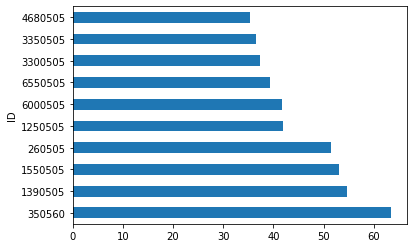

In [10]:
sorted_by_APIndex['APIndex'].head(10).plot(kind="barh")